**Public finance - modelling intensive margin labor supply**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import time
from scipy import linalg
from scipy import optimize
import sympy as sm
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import modelproject.custom_funcs as custom

sm.init_printing(use_unicode=True) # for pretty printing

# Describe the model

Describe the problem of interest

\\[ \max u(x,1-h) \text{ s.t. } x=(1-t_{w})wh-t_{0}+a \\]

 - $u(\cdot)$ is the utility funciton
 - $x$ is consumption
 - $1-h$ is leisure
 - $w$ is the wage
 - $t_{w}$ is a tax on labor income
 - $t_{0}$ is lump sum tax
 - $a$ is non-labor income

Specify the utility function

\\[ u(x,1-h)=x+\frac{1}{1+\frac{1}{\varepsilon}}(1-h)^{1+\frac{1}{\varepsilon}} \\]

where $\varepsilon$ is the elasticity of substitution

# Define the model in Python

Specify the symbols

In [2]:
x = sm.symbols('x') # x1 is a Python variable representing the symbol x_1
h = sm.symbols('h')
epsilon = sm.symbols('epsilon')
tw = sm.symbols('t_w')
w = sm.symbols('w')
t0 = sm.symbols('t_0')
a = sm.symbols('a')

Defining the utility function:

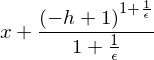

In [3]:
utility=x+(1/(1+1/epsilon))*(1-h)**(1+1/epsilon)
utility

Defining the budget constraint

In [4]:
budget_con = sm.Eq(x,(1-tw)*w*h-t0+a)
budget_con

# Solve the model

**Find optimimum - Algorithm**

1. Insert the budget constraint in the utility function
2. Take the derivative wrt. $h$
3. Solve the first order conditions

**Step 1**

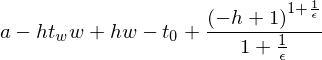

In [5]:
x_from_con=sm.solve(budget_con,x)
utility_sub=utility.subs(x,x_from_con[0])
utility_sub

**Step 2**

In [6]:
#find first derivative wrt. h
foc=sm.diff(utility_sub,h)
#simplify the expression
foc_sim=sm.simplify(foc)

**Step 3**

In [7]:
sol = sm.solve(foc_sim,h)
sol

# Use solutions

In [8]:
# Turn solution into Python function
_sol_func=sm.lambdify((tw,w,epsilon),sol[0])
def sol_func(tw=0.2,w=10,epsilon=-0.5,a=2,t0=1):
    opt_h=_sol_func(tw,w,epsilon)
    opt_x=(1-tw)*w*opt_h-t0+a
    opt_u=opt_x+1/(1+1/epsilon)*(1-opt_h)**(1+1/epsilon)
    return opt_h, opt_x, opt_u

# find optimum for hours worked, concsumption level and the implied utility
optimal_h,optimal_x,optimal_u=sol_func()

# find optimum for hours worked, consumption level and the implied utility when the tax increases
optimal_h_tax,optimal_x_tax,optimal_u_tax=sol_func(tw=0.5)




In [9]:
#Find optimum for hours worked, consumption level under compensation

# As the utility function is quasi-linear there are no income effect
# This imply that the optimal level hours worked under compensation is 
# the same without compensation
optimal_h_com=optimal_h_tax

#the optimal level of comsumption under compensation can be found as:
optimal_x_com=optimal_u-1/(1+1/(-0.5))*(1-optimal_h_com)**(1+1/(-0.5))



In [10]:
# tax income before tax increase
tax_before=optimal_h*0.2

# tax income before tax increase
tax_after=optimal_h_tax*0.5

print(tax_before,tax_after)

0.12928932188134526 0.27639320225002106


# Plotting results

In [11]:
#define function for the budget constraint
def budget_cons(h,tw=0.2,w=10,a=2,t0=1):
    return (1-tw)*w*h-t0+a

#define function for the compensated budget constraint
def budget_cons_comp(h,u_b,u_a,tw=0.5,w=10,a=2,t0=1):
    return (1-tw)*w*h-t0+a+(u_b-u_a)

#define function for the utility function
def utility(h,u,epsilon=-0.5):
    return u-(1/(1+1/epsilon))*(1-h)**(1+1/epsilon)

#make different grids to evaluate the two functions with
grid = np.linspace(0,1,500)
grid_b = np.linspace(optimal_h-0.2,optimal_h+0.2,500)
grid_b_tax = np.linspace(optimal_h_tax-0.2,optimal_h_tax+0.2,500)

#before tax increase
budget_line=budget_cons(grid)
u_func_opt=utility(grid_b,optimal_u)

#after tax increase
budget_line_tax=budget_cons(grid,tw=0.5)
budget_line_tax_com=budget_cons_comp(grid,optimal_u,optimal_u_tax)
u_func_opt_tax=utility(grid_b_tax,optimal_u_tax)


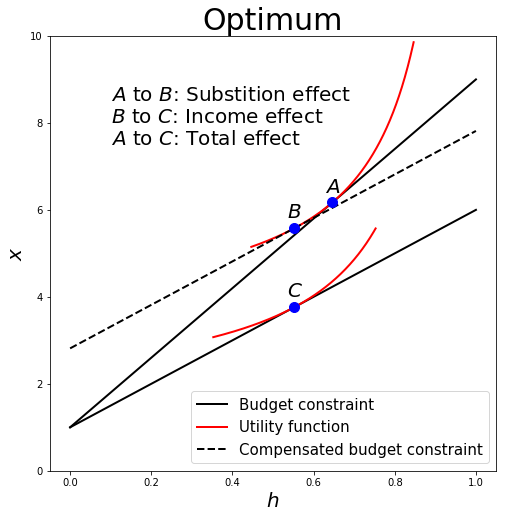

In [12]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(1,1,1)

ax.plot(grid,budget_line,lw=2,linestyle='-',color='black',label='Budget constraint',zorder=-1)
ax.plot(grid_b,u_func_opt,lw=2,linestyle='-',color='red',label='Utility function',zorder=-1)
ax.plot(grid,budget_line_tax,lw=2,linestyle='-',color='black',zorder=-1)
ax.plot(grid,budget_line_tax_com,lw=2,linestyle='--',color='black',label='Compensated budget constraint',zorder=-1)
ax.plot(grid_b_tax,u_func_opt_tax,lw=2,linestyle='-',color='red',zorder=-1)


plt.scatter(optimal_h, optimal_x, s=100, zorder=1,marker="o",color='blue')
plt.annotate('$A$',xy=(optimal_h, optimal_x),xytext=(-7,10),textcoords='offset points',fontsize=20)

plt.scatter(optimal_h_com, optimal_x_com, s=100,zorder=1, marker="o",color='blue')
plt.annotate('$B$',xy=(optimal_h_com, optimal_x_com),xytext=(-7,10),textcoords='offset points',fontsize=20,)

plt.scatter(optimal_h_tax, optimal_x_tax, s=100, zorder=1,marker="o",color='blue')
plt.annotate('$C$',xy=(optimal_h_tax, optimal_x_tax),xytext=(-7,10),textcoords='offset points',fontsize=20,)

plt.text(0.1, 7.5,'$A$ to $B$: Substition effect \n$B$ to $C$: Income effect \n$A$ to $C$: Total effect', fontsize=20)

ax.set_ylim([0,10]);
ax.legend(loc='lower right',fontsize=15)

ax.set_xlabel('$h$',fontsize=20)
ax.set_ylabel('$x$',fontsize=20)
ax.set_title('Optimum',fontsize=30)
plt.show()

# Optimize the utility numerically

We use the utility-function expressed only as a function $h$

In [13]:
#make the utility function into a python function
def _utility_func(h):
    return (1-0.2)*10*h-1+2+(1/(1+1/(-0.5)))*(1-h)**(1+1/(-0.5))
def utility_func(x):
    #add a -1 to convert the maximization problem into a minimization problem
    return -1*_utility_func(x[0])


/Users/sandrusurendran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in reciprocal
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Optimum')

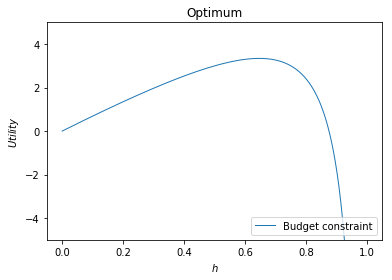

In [14]:
# evaluate the utility function 
u_grid=_utility_func(grid)

#plot the utility function
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(grid,u_grid,lw=1,label='Budget constraint')

ax.set_ylim([-5,5]);
ax.legend(loc='lower right')

ax.set_xlabel('$h$')
ax.set_ylabel('$Utility$')
ax.set_title('Optimum')

In [15]:
x0 = [0.2]
result = optimize.minimize(utility_func,x0,
                           method='BFGS',
                           options={'disp':True}) # display the results

optimal_h_num=result.x
optimal_u_num=(-1)*result.fun
print(f'Optimmal hours worked: {optimal_h_num[0]}')


Optimization terminated successfully.
         Current function value: -3.343146
         Iterations: 6
         Function evaluations: 27
         Gradient evaluations: 9
Optimmal hours worked: 0.6464465637096602
